In [1]:
!rm -r AI2022BS
!git clone https://github.com/UmbertoJr/AI2022BS.git

rm: cannot remove 'AI2022BS': No such file or directory
Cloning into 'AI2022BS'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 184 (delta 98), reused 128 (delta 44), pack-reused 0
Receiving objects: 100% (184/184), 1.85 MiB | 5.04 MiB/s, done.
Resolving deltas: 100% (98/98), done.


## Third Lab

What we are going to do today:
- Introduce two optimizers for local search methods
- Use the optimizer with the methods defined before

This cell below is simply importing some useful stuff for later

In [2]:
import glob
import numpy as np
from matplotlib import pyplot as plt
from time import time as t

## Optimizers
### 2opt
As we saw last time, we have 12 problems and two have an optimal solution

## Solution

In [3]:
class TwoOpt:

    @staticmethod
    def step2opt(solution, matrix_dist, distance):
        seq_length = len(solution)
        tsp_sequence = np.array(solution)
        uncrosses = 0
        for i in range(1, seq_length - 2):
            for j in range(i + 2, seq_length):
                gain = TwoOpt.gain(i, j, tsp_sequence, matrix_dist) 
                if gain > 0:
                    uncrosses += 1
                    new_tsp_sequence = TwoOpt.swap2opt(tsp_sequence, i, j)
                    tsp_sequence = np.copy(new_tsp_sequence)
                    distance -= gain 
        return tsp_sequence, distance, uncrosses

    @staticmethod
    def swap2opt(tsp_sequence, i, j):
        new_tsp_sequence = np.copy(tsp_sequence)
        new_tsp_sequence[i:j] = np.flip(tsp_sequence[i:j], axis=0)  # flip or swap ?
        return new_tsp_sequence

    @staticmethod
    def gain(i, j, tsp_sequence, matrix_dist):
        old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
            tsp_sequence[j], tsp_sequence[j - 1]])
        changed_links_len = (matrix_dist[tsp_sequence[j - 1], tsp_sequence[i - 1]] + matrix_dist[
            tsp_sequence[i], tsp_sequence[j]])
        return + old_link_len - changed_links_len

    @staticmethod
    def local_search(solution, actual_len, matrix_dist):
        new_tsp_sequence = np.copy(np.array(solution))
        uncross = 0
        while True:
            new_tsp_sequence, new_reward, uncr_ = TwoOpt.step2opt(new_tsp_sequence, matrix_dist, actual_len)
            uncross += uncr_
            if new_reward < actual_len:
                actual_len = new_reward
                yield new_tsp_sequence, actual_len, 0, False
            else:
                return new_tsp_sequence, actual_len, 1, True


def twoOpt(solution, instance):
    matrix_dist = instance.dist_matrix
    actual_len = compute_length(solution, matrix_dist)
    
    for data in TwoOpt.local_search(solution, actual_len, matrix_dist):
        data = data
        if data[3]:
            return data[0], data[1]
    return data[0], data[1]


In [4]:
import numpy as np
from AI2022BS.src.utils import compute_length


def step2opt(solution, matrix_dist, distance):
  seq_length = len(solution)
  tsp_sequence = np.array(solution)
  uncrosses = 0
  # TODO
  for i in range(seq_length):
    for j in range(i + 1, seq_length):
      if gain(i, j, tsp_sequence, matrix_dist) > 0:
        new_distance = distance - gain(i, j, tsp_sequence, matrix_dist)
        tsp_sequence = swap2opt(tsp_sequence, i, j)
        return tsp_sequence, new_distance, 1
  # END TODO
  return tsp_sequence, distance, 1


def swap2opt(tsp_sequence, i, j):
  # TODO
  n = len(tsp_sequence)
  new_tsp_sequence = np.copy(tsp_sequence)
  new_tsp_sequence[i:j + 1 - n] = np.flip(tsp_sequence[i:j + 1 -n], axis=0)  
  # END TODO
  return new_tsp_sequence


def gain(i, j, tsp_sequence, matrix_dist):
  n = matrix_dist.shape[0]
  old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + 
                  matrix_dist[tsp_sequence[j], tsp_sequence[j + 1 - n]])
  changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + 
                       matrix_dist[tsp_sequence[i], tsp_sequence[j + 1 - n]])
  return + old_link_len - changed_links_len


def loop2opt(solution, instance, max_num_of_uncrosses=10000):
    matrix_dist = instance.dist_matrix
    new_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    try_again = True
    seq_length = new_len
    # TODO
    while uncross < max_num_of_uncrosses:
      new_tsp_sequence, new_reward, uncr_ = step2opt(new_tsp_sequence, matrix_dist, new_len)
      new_tsp_sequence = np.roll(new_tsp_sequence, np.random.randint(seq_length))
      if new_reward < new_len:
        new_len = new_reward
        try_again = True
        uncross += uncr_
      else:
        if try_again:
          try_again = False
        else:
          return new_tsp_sequence.tolist(), new_len, uncross
    # END TODO
    return new_tsp_sequence.tolist(), new_len, uncross
    

#### Let's test it



#############################
name: eil76
nPoints: 76
best_sol: 538.0
exist optimal: True


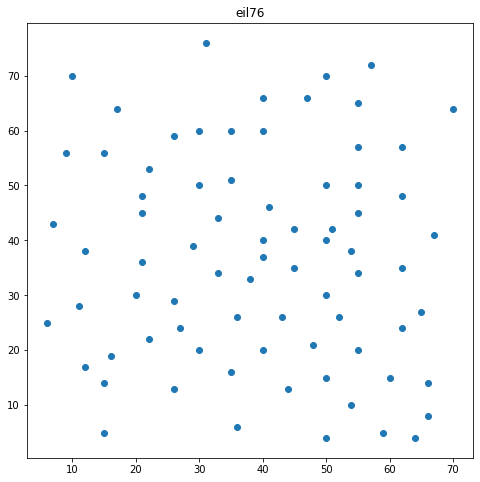

In [5]:
from AI2022BS.src.io_tsp import ProblemInstance
example_problem = "AI2022BS/problems/eil76.tsp"
p_inst = ProblemInstance(example_problem)
p_inst.print_info()
p_inst.plot_data()

In [6]:
from AI2022BS.src.TSP_solver import TSPSolver
from AI2022BS.src.constructive_algorithms import (
    random_method,
    nearest_neighbor,
    best_nearest_neighbor,
    multi_fragment_mf
)

available_solvers = {
    "random": random_method,
    "nn":nearest_neighbor,
    "best_nn":best_nearest_neighbor,
    "multi_fragment": multi_fragment_mf
}

###  solving with ['nn'] ####


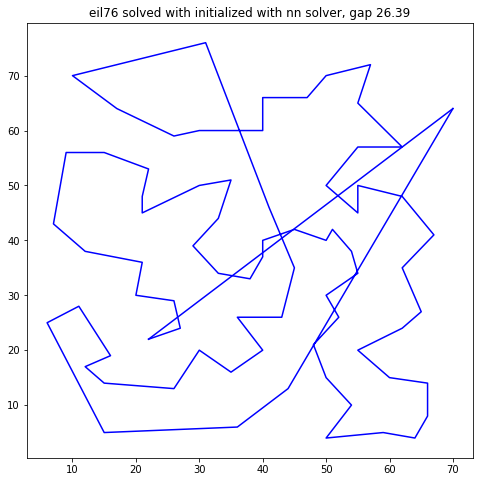

best solution with len 680.0 
with a total time of 0.00512 seconds
solution found has a 26.39 % gap
2.49052357673645


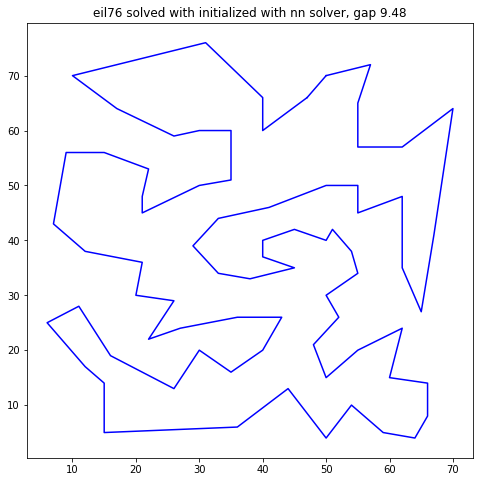

best solution with len 589.0 
with a total time of 2.49052 seconds
 9.48 % gap
with 10000 number of uncrossed edges
589.0 589.0


In [7]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2opt(solver.solution, p_inst)
# solution, new_length = twoOpt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")
print(compute_length(solver.solution, p_inst.dist_matrix), solver.found_length)

### 2.5opt

In [8]:
import numpy as np

from AI2022BS.src.utils import compute_length

def step2dot5opt(solution, matrix_dist, distance):
    seq_length = len(solution)
    tsp_sequence = np.array(solution)
    uncrosses = 0
    for i in range(1, seq_length - 1):
        for j in range(i + 2, seq_length - 1):
          #TODO
          # 2opt gain
          gain1 = gain(i,j, tsp_sequence, matrix_dist) 
          
          # node shift 1 gain
          s_gain1 = shift_gain1(i, j, tsp_sequence, matrix_dist)
          
          # node shift 2 gain
          s_gain2 = shift_gain2(i, j, tsp_sequence, matrix_dist)

          best_option = np.argmax([gain1, s_gain1, s_gain2])
          if [gain1, s_gain1, s_gain2][best_option] > 0:  
            if best_option == 0:
              new_distance = distance - gain1
              new_solution = swap2opt(tsp_sequence, i, j)
            elif best_option == 1:
              new_distance = distance - s_gain1
              new_solution = shift1(tsp_sequence, i, j)
            else:
              new_distance = distance - s_gain2
              new_solution = shift2(tsp_sequence, i, j)
            
            new_solution = np.roll(new_solution, np.random.randint(seq_length))
            return new_solution, new_distance, 1
            
          # END TODO
    return tsp_sequence, distance, uncrosses


def shift1(tsp_sequence, i, j):
  n = len(tsp_sequence)
  new_tsp_sequence = np.concatenate([tsp_sequence[:i], 
                                     tsp_sequence[i + 1 -n: j + 1 -n], 
                                     [tsp_sequence[i]], 
                                     tsp_sequence[j + 1 - n:]])
  return new_tsp_sequence


def shift_gain1(i, j, tsp_sequence, matrix_dist):
    n = matrix_dist.shape[0]
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] +
                    matrix_dist[tsp_sequence[i], tsp_sequence[i + 1 - n]] +
                    matrix_dist[tsp_sequence[j], tsp_sequence[j + 1 - n]])
    changed_links_len = (matrix_dist[tsp_sequence[i - 1], tsp_sequence[i + 1 - n]] +
                         matrix_dist[tsp_sequence[i], tsp_sequence[j]]
                         + matrix_dist[tsp_sequence[i], tsp_sequence[j + 1 - n]])
    return + old_link_len - changed_links_len


def shift2(tsp_sequence, i, j):
  n = len(tsp_sequence)
  new_tsp_sequence = np.concatenate([tsp_sequence[:i], 
                                     [tsp_sequence[j]], 
                                     tsp_sequence[i: j], 
                                     tsp_sequence[j + 1 - n:]])
  return new_tsp_sequence


def shift_gain2(i, j, tsp_sequence, matrix_dist):
  n = matrix_dist.shape[0]
  old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] +
                  matrix_dist[tsp_sequence[j], tsp_sequence[j - 1]] +
                  matrix_dist[tsp_sequence[j], tsp_sequence[j + 1 - n]])
  changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + 
                       matrix_dist[tsp_sequence[i], tsp_sequence[j]] +
                       matrix_dist[tsp_sequence[j - 1], tsp_sequence[j + 1 - n]])
  return + old_link_len - changed_links_len


def loop2dot5opt(solution, instance):
    matrix_dist = instance.dist_matrix
    actual_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    new_len = actual_len
    try_again = True
    while True:
      # TODO
      new_tsp_sequence, new_len, uncr_ = step2dot5opt(new_tsp_sequence, matrix_dist, actual_len)
      uncross += uncr_
      # print(new_len, actual_len)
      if new_len < actual_len:
        actual_len = new_len
        try_again = True
      else:
        if try_again:
          try_again = False
        else:
          return new_tsp_sequence.tolist(), new_len, uncross   

###  solving with ['nn'] ####


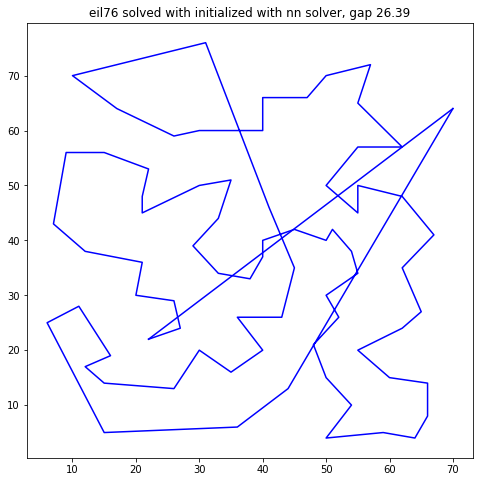

best solution with len 680.0 
with a total time of 0.00509 seconds
solution found has a 26.39 % gap
0.46839141845703125


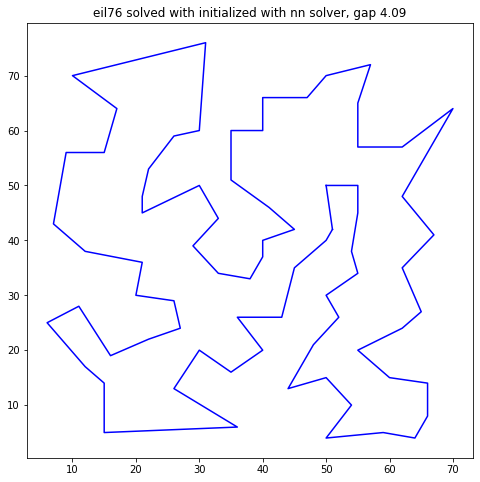

 4.09 % gap
with 23 number of uncrossed edges


In [9]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2dot5opt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### Let's analyse the performances of the optimizers and the algorithms discussed until now


###  solving with ['nn'] ####


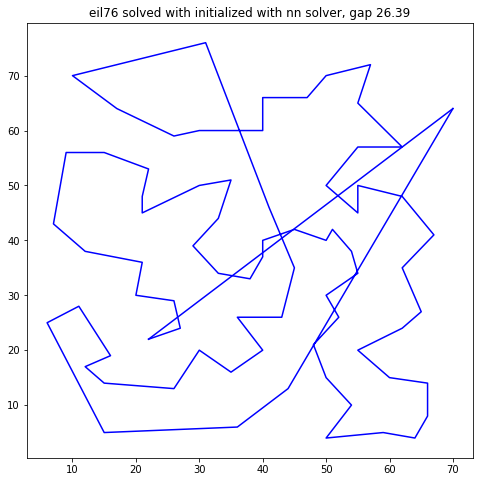

best solution with len 680.0 
with a total time of 0.00545 seconds
solution found has a 26.39 % gap
4.449992656707764


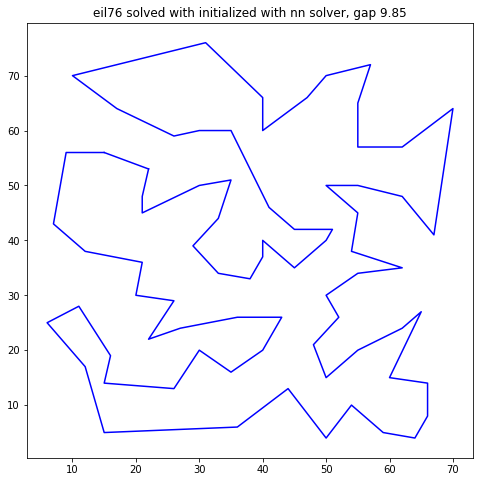

 9.85 % gap
with 10000 number of uncrossed edges
0.26861047744750977


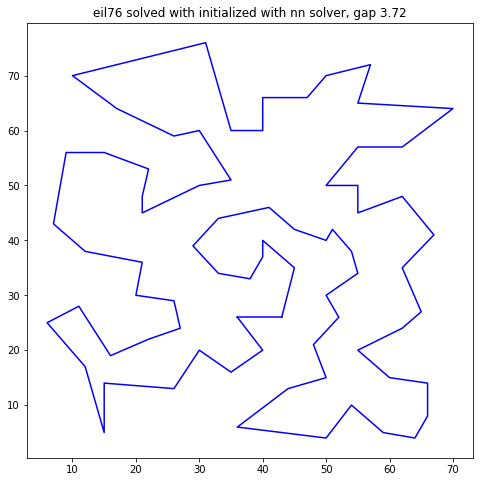

 3.72 % gap
with 27 number of uncrossed edges


In [10]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

old_solution=solver.solution


start = t()
solution, new_length, uncross = loop2opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

start = t()
solution, new_length, uncross = loop2dot5opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")